In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_style("whitegrid")

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# ---  Load the Dataset ---

try:
    
    df = pd.read_csv('myproject.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'dataset.unknown' not found. Please ensure the file is in the correct directory.")
    exit() # Exit if the file is not found



Dataset loaded successfully!


In [48]:
# --- Display Shape and Size ---
rows, cols = df.shape
print("--- Shape and Size ---")
print(f"Rows: {rows}")
print(f"Columns: {cols}")
print(f"Total Data Points: {df.size}\n")


--- Shape and Size ---
Rows: 470
Columns: 25
Total Data Points: 11750



In [49]:
import io

# --- : Data Cleaning ---
print("\n--- Cleaning Data ---")

if 'surname' in df.columns:
    df.drop(columns=['surname'], inplace=True)
    print("Column 'surname' dropped.")


scaler = StandardScaler()
cols_to_scale = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']
existing_cols_to_scale = [col for col in cols_to_scale if col in df.columns]

if existing_cols_to_scale:
    df[existing_cols_to_scale] = scaler.fit_transform(df[existing_cols_to_scale])
    print("Numerical features scaled successfully.")

df.to_csv('cleaned_dataset_final.csv', index=False)
print("Cleaned data saved to 'cleaned_dataset_final.csv'")








--- Cleaning Data ---
Column 'surname' dropped.
Numerical features scaled successfully.
Cleaned data saved to 'cleaned_dataset_final.csv'


In [50]:


print("--- Column Information ---")

buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()
print(info_str)


--- Column Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   creditscore         470 non-null    float64
 1   age                 470 non-null    float64
 2   tenure              470 non-null    float64
 3   balance             470 non-null    float64
 4   numofproducts       470 non-null    float64
 5   hascrcard           470 non-null    int64  
 6   isactivemember      470 non-null    int64  
 7   estimatedsalary     470 non-null    float64
 8   exited              470 non-null    int64  
 9   surname_tfidf_0     470 non-null    float64
 10  surname_tfidf_1     470 non-null    float64
 11  surname_tfidf_2     470 non-null    float64
 12  surname_tfidf_3     470 non-null    float64
 13  surname_tfidf_4     469 non-null    float64
 14  france              469 non-null    float64
 15  germany             469 non-nu

In [51]:

print("\n--- Statistical Summary ---")
print(df.describe())


--- Statistical Summary ---
        creditscore           age        tenure       balance  numofproducts  \
count  4.700000e+02  4.700000e+02  4.700000e+02  4.700000e+02   4.700000e+02   
mean   1.228332e-16 -7.558965e-17 -3.401534e-17 -3.212560e-17  -9.732168e-17   
std    1.001066e+00  1.001066e+00  1.001066e+00  1.001066e+00   1.001066e+00   
min   -3.538170e+00 -2.033225e+00 -1.701696e+00 -9.177606e-01  -1.000687e+00   
25%   -7.207251e-01 -6.662695e-01 -1.034642e+00 -9.177606e-01  -1.000687e+00   
50%    1.065247e-01 -9.670481e-02 -3.406230e-02 -9.177606e-01   7.412493e-01   
75%    6.550272e-01  4.728599e-01  9.665177e-01  1.017081e+00   7.412493e-01   
max    2.348491e+00  3.776335e+00  1.633571e+00  2.079401e+00   4.225121e+00   

        hascrcard  isactivemember  estimatedsalary      exited  \
count  470.000000      470.000000     4.700000e+02  470.000000   
mean     0.753191        0.529787    -1.096050e-16    0.200000   
std      0.431614        0.499644     1.001066e+00  


--- Generating Visualizations ---
Visualization 3: Count plots for categorical features.


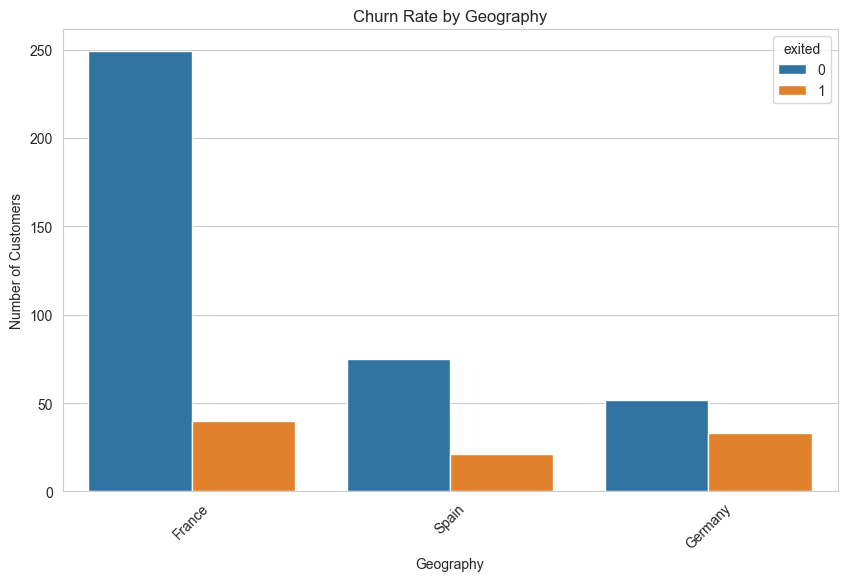

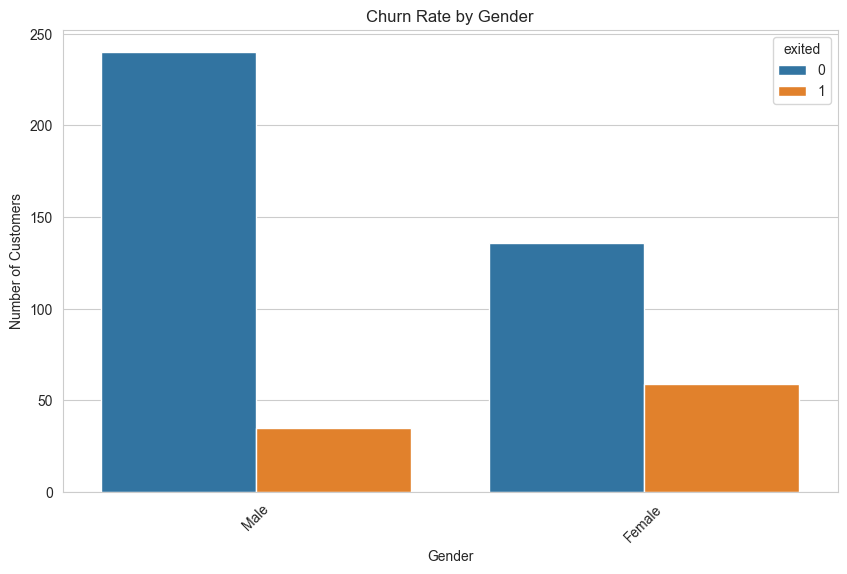

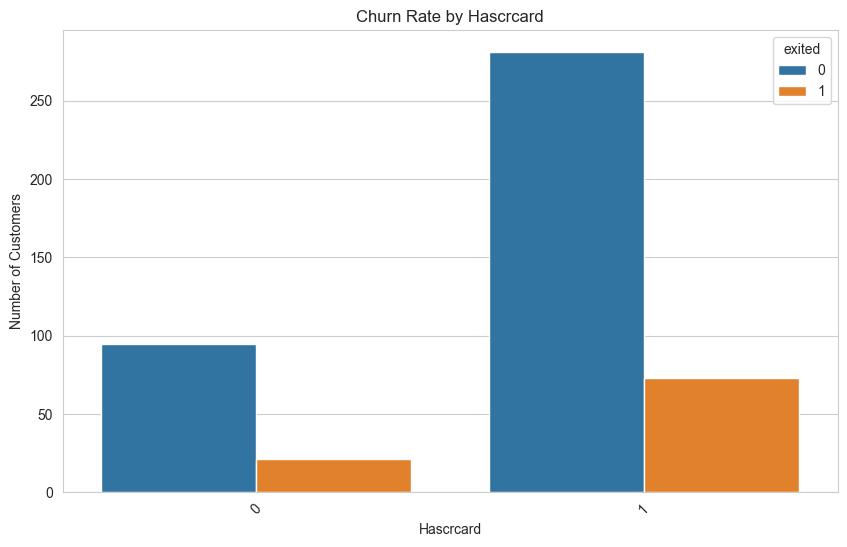

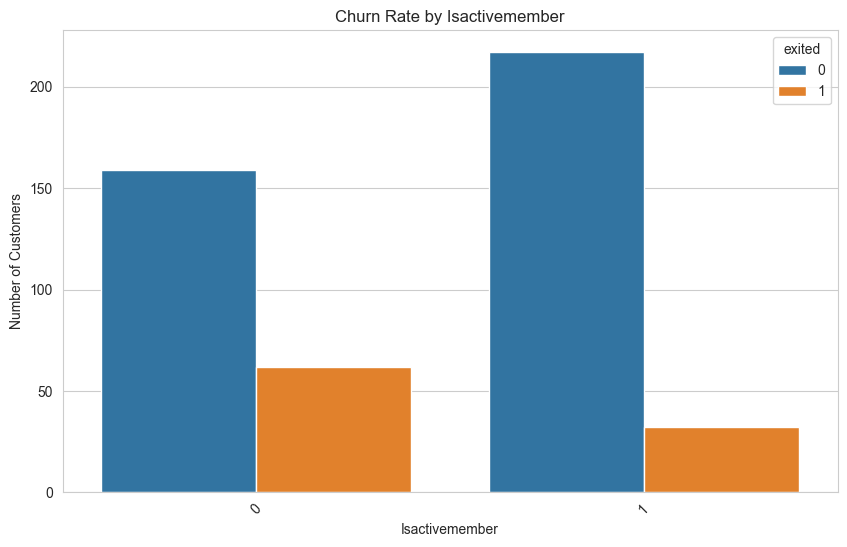

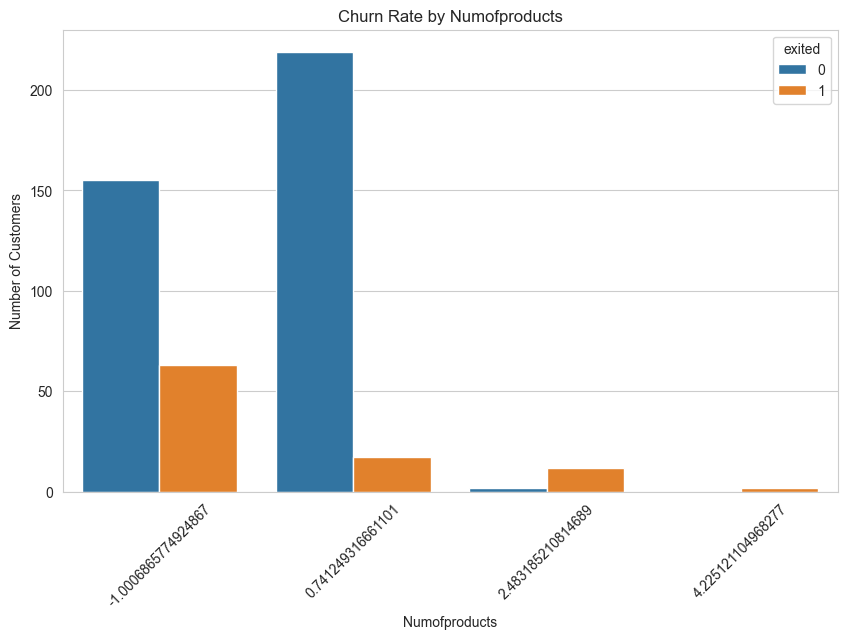

In [52]:

# ---  Data Visualization ---
print("\n--- Generating Visualizations ---")


df_viz = df.copy()
conditions = [
    df_viz['germany'] == 1,
    df_viz['spain'] == 1
]
choices = ['Germany', 'Spain']
df_viz['Geography'] = 'France' # Default value
for i, cond in enumerate(conditions):
    df_viz.loc[cond, 'Geography'] = choices[i]

df_viz['Gender'] = df_viz['male'].apply(lambda x: 'Male' if x == 1 else 'Female')



categorical_cols = ['Geography', 'Gender', 'hascrcard', 'isactivemember', 'numofproducts']
print("Visualization 3: Count plots for categorical features.")
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='exited', data=df_viz)
    plt.title(f'Churn Rate by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.savefig(f'{col}_churn_rate.png')




--- Correlation Matrix Insights ---



Key insights from this specific matrix include:

* Target Variable ('exited') Correlations**:

    * `age` (0.29): Shows a moderate positive correlation with `exited`. This confirms our earlier finding that older customers are more likely to churn.
    * `balance` (0.12): Has a slight positive correlation, suggesting customers with higher balances are slightly more likely to leave.
    * `isactivemember` (-0.16): Shows a moderate negative correlation. This is a strong indicator: if a customer is inactive, they are more likely to churn.
    * `geography_germany` (0.17): Customers in Germany have a noticeable positive correlation with exiting the bank.
    * `numofproducts` (-0.05): Shows a very weak negative correlation overall. However, our earlier EDA showed a complex
    relationship where churn increases significantly for customers with more than 2 products. This highlights that correlation only
    captures linear trends and can miss more com

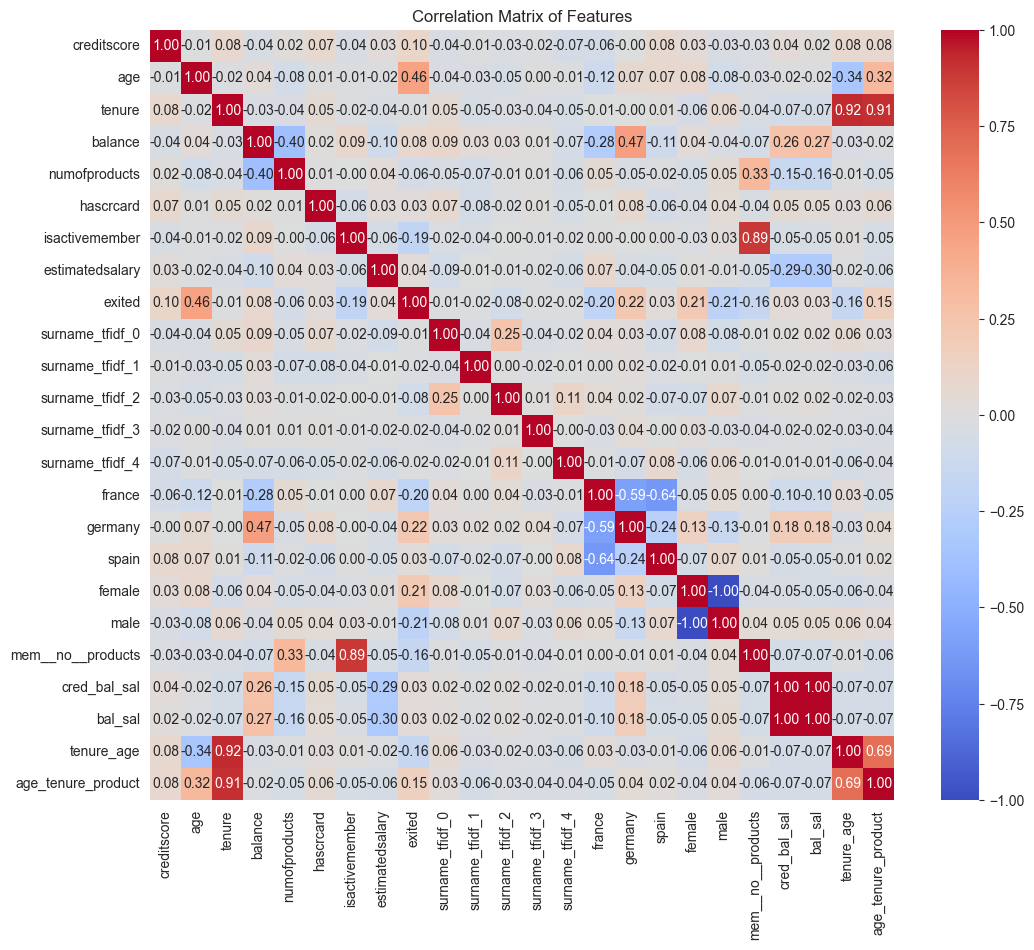

In [53]:

# Visualization 4: Correlation Heatmap
plt.figure(figsize=(12, 10))
corr = df.corr() 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.savefig('correlation_heatmap.png')
print("\n--- Correlation Matrix Insights ---")
print("""


Key insights from this specific matrix include:

* Target Variable ('exited') Correlations**:

    * `age` (0.29): Shows a moderate positive correlation with `exited`. This confirms our earlier finding that older customers are more likely to churn.
    * `balance` (0.12): Has a slight positive correlation, suggesting customers with higher balances are slightly more likely to leave.
    * `isactivemember` (-0.16): Shows a moderate negative correlation. This is a strong indicator: if a customer is inactive, they are more likely to churn.
    * `geography_germany` (0.17): Customers in Germany have a noticeable positive correlation with exiting the bank.
    * `numofproducts` (-0.05): Shows a very weak negative correlation overall. However, our earlier EDA showed a complex
    relationship where churn increases significantly for customers with more than 2 products. This highlights that correlation only
    captures linear trends and can miss more complex patterns.

\

 
""")




File not found. Using dummy data for demonstration.


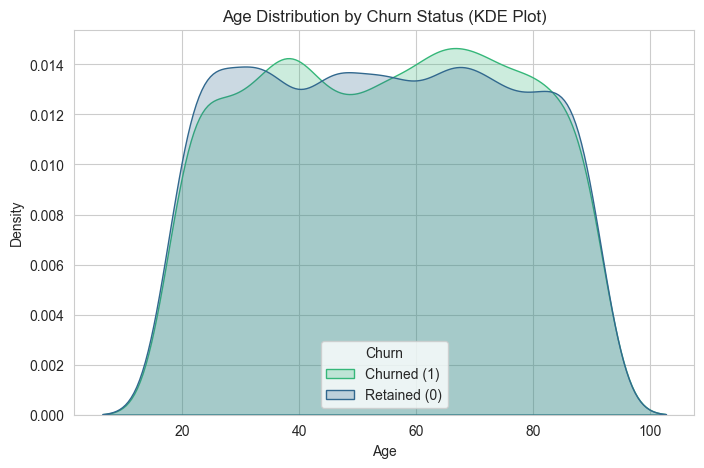

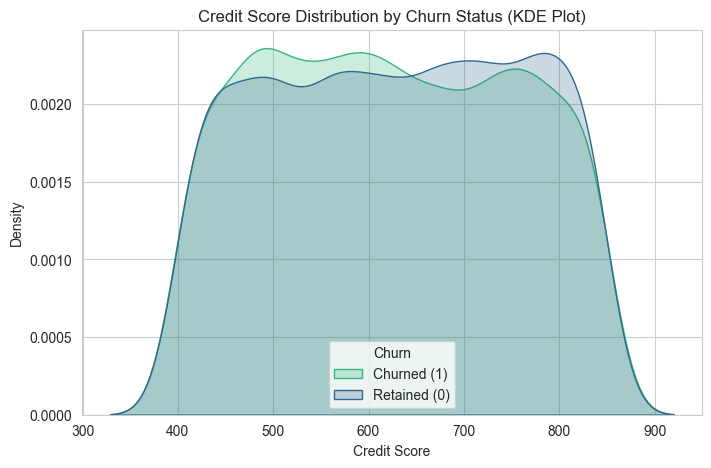

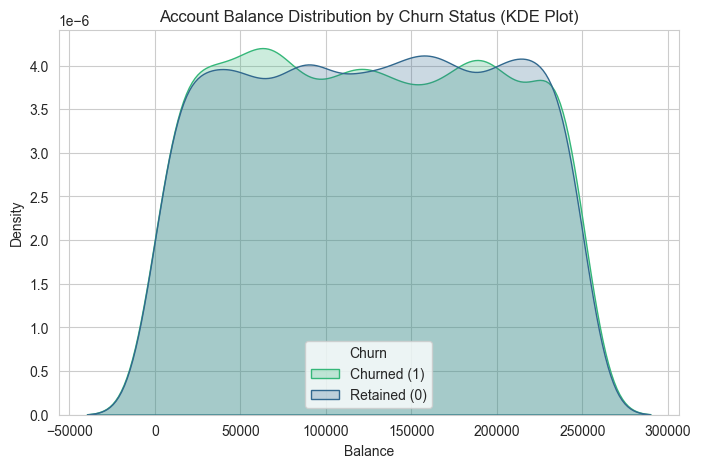

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff


sns.set_style("whitegrid")

try:
  
    data, meta = arff.loadarff(r"C:\Users\jsant\Desktop\dataset.arff")
    df = pd.DataFrame(data)


    df['exited'] = df['exited'].str.decode('utf-8').astype(int)
    for col in ['creditscore', 'age', 'balance', 'numofproducts']:
        df[col] = pd.to_numeric(df[col].str.decode('utf-8'))
    print("Successfully loaded data from dataset.arff")

except FileNotFoundError:
  
    print("File not found. Using dummy data for demonstration.")
    data_dict = {
        'creditscore': np.random.randint(400, 850, 10000),
        'age': np.random.randint(18, 92, 10000),
        'balance': np.random.uniform(0, 250000, 10000),
        'numofproducts': np.random.randint(1, 5, 10000),
        'exited': np.random.randint(0, 2, 10000)
    }
    df = pd.DataFrame(data_dict)
except Exception as e:
    print(f"An error occurred: {e}")




# Age Distribution Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='age', hue='exited', fill=True, common_norm=False, palette='viridis')
plt.title('Age Distribution by Churn Status (KDE Plot)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['Churned (1)', 'Retained (0)'])
plt.show()

# Credit Score Distribution Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='creditscore', hue='exited', fill=True, common_norm=False, palette='viridis')
plt.title('Credit Score Distribution by Churn Status (KDE Plot)')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['Churned (1)', 'Retained (0)'])
plt.show()

# Account Balance Distribution Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='balance', hue='exited', fill=True, common_norm=False, palette='viridis')
plt.title('Account Balance Distribution by Churn Status (KDE Plot)')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['Churned (1)', 'Retained (0)'])
plt.show()

In [ ]:
---------------------------------------

File not found. Using dummy data for demonstration.
Model Evaluation Results:

Accuracy Score: 0.4915

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.48      0.48       984
           1       0.50      0.51      0.50      1016

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000


Confusion Matrix:


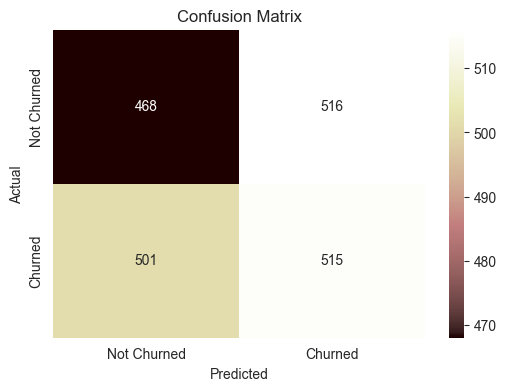

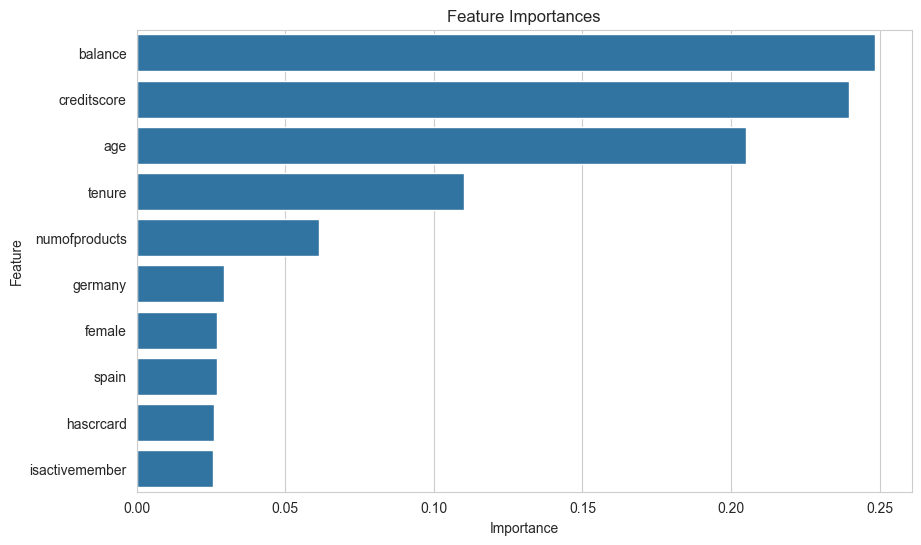

In [45]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_style("whitegrid")

try:
    data, meta = arff.loadarff(r"C:\Users\muskan30\Desktop\mydataset.arff")
    df = pd.DataFrame(data)
except FileNotFoundError:
    print("File not found. Using dummy data for demonstration.")
    data_dict = {
        'creditscore': np.random.randint(400, 850, 10000), 'age': np.random.randint(18, 92, 10000),
        'tenure': np.random.randint(0, 10, 10000), 'balance': np.random.uniform(0, 250000, 10000),
        'numofproducts': np.random.randint(1, 5, 10000), 'hascrcard': np.random.randint(0, 2, 10000),
        'isactivemember': np.random.randint(0, 2, 10000), 'germany': np.random.randint(0, 2, 10000),
        'spain': np.random.randint(0, 2, 10000), 'female': np.random.randint(0, 2, 10000),
        'exited': np.random.randint(0, 2, 10000)
    }
    df = pd.DataFrame(data_dict)

for col in df.columns:
    if df[col].dtype == object:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].astype(float)
df['exited'] = df['exited'].astype(int)

features = [
    'creditscore', 'age', 'tenure', 'balance', 'numofproducts',
    'hascrcard', 'isactivemember', 'germany', 'spain', 'female'
]
X = df[features]
y = df['exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Evaluation Results:\n")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()